<a href="https://colab.research.google.com/github/Michaelzats/Crypto-Predictor/blob/main/Crypto_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [209]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('BTC-USD (1).csv')

In [210]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2785
Total number of fields present in the dataset:  7


In [211]:
maindf.shape

(2785, 7)

In [212]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [213]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2780,2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,33903704907
2781,2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,30882994649
2782,2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731
2783,2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2784,2022-05-02,38491.511719,39061.562500,38434.910156,38674.664063,38674.664063,33165641728


In [214]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2785 non-null   object 
 1   Open       2785 non-null   float64
 2   High       2785 non-null   float64
 3   Low        2785 non-null   float64
 4   Close      2785 non-null   float64
 5   Adj Close  2785 non-null   float64
 6   Volume     2785 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.4+ KB


In [215]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2.785000e+03
mean,12085.454849,12402.977306,11736.486636,12097.514220,12097.514220,1.502723e+10
std,16598.580083,17030.854568,16104.687257,16600.930844,16600.930844,1.988507e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.469971,617.911987,609.617004,613.020996,613.020996,8.312110e+07
50%,6452.790039,6546.540039,6350.169922,6461.009766,6461.009766,5.386320e+09
75%,10982.543945,11377.599609,10694.299805,10990.873047,10990.873047,2.552117e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [216]:
# Checking for Null Values
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

# If dataset had null values 
# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [217]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2014-09-17
Ending Date 2022-05-02


In [218]:
# Analysis from 2014-2022
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2022-02-19')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563


In [219]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,12855.131425,12828.374881
February,12773.095753,12837.782739
March,10918.895761,10957.226324
April,11338.448900,11359.962198
May,10659.455257,10580.209317
June,9299.305977,9294.420703
July,9285.402500,9330.128271
August,11312.971706,11345.157739
September,10489.365578,10462.378150


In [220]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [221]:
#LSTM Model
# First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2785, 2)


In [222]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [223]:
# Data of just 2 Year

closedf = closedf[closedf['Date'] > '2020-04-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])
closedf

Total data for prediction:  761


,Date,Close
2024,2020-04-02,6793.624512
2025,2020-04-03,6733.387207
2026,2020-04-04,6867.527344
2027,2020-04-05,6791.129395
2028,2020-04-06,7271.781250
...,...,...
2780,2022-04-28,39773.828125
2781,2022-04-29,38609.824219
2782,2022-04-30,37714.875000
2783,2022-05-01,38469.093750


In [224]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [225]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(761, 1)


In [226]:
# we keep the training set as 70% and 40% testing set

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (532, 1)
test_data:  (229, 1)


In [227]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [228]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (501, 30)
y_train:  (501,)
X_test:  (198, 30)
y_test (198,)


In [229]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (501, 30, 1)
X_test:  (198, 30, 1)


In [230]:
# Actuall Model Building
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [231]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
16/16 [==============================] - 2s 26ms/step - loss: 0.2362 - val_loss: 0.3923
Epoch 2/200
16/16 [==============================] - 0s 12ms/step - loss: 0.1404 - val_loss: 0.2113
Epoch 3/200
16/16 [==============================] - 0s 13ms/step - loss: 0.0728 - val_loss: 0.0829
Epoch 4/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0223 - val_loss: 0.0040
Epoch 5/200
16/16 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 6/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 7/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 8/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 9/200
16/16 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 10/200
16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - val_loss: 0.0031

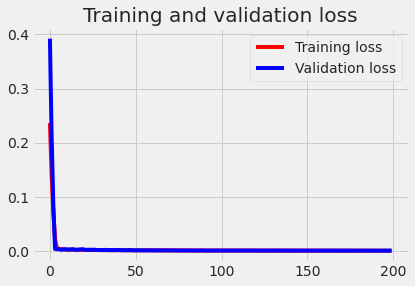

<Figure size 432x288 with 0 Axes>

In [232]:
# Plotting Loss vs Validation loss 
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [233]:
# The prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((501, 1), (198, 1))

In [234]:
# Model Evaluation
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [235]:
# Evaluation metrices RMSE and MAE
print("Train data Root-mean-square deviation: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data Mean squared error: ", mean_squared_error(original_ytrain,train_predict))
print("Train data measure of errors: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data Root-mean-square deviation: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data Mean squared error: ", mean_squared_error(original_ytest,test_predict))
print("Test data measure of errors: ", mean_absolute_error(original_ytest,test_predict))

Train data Root-mean-square deviation:  1521.9501309587638
Train data Mean squared error:  2316332.2011253983
Train data measure of errors:  976.3746394039422
-------------------------------------------------------------------------------------
Test data Root-mean-square deviation:  1641.5325629955244
Test data Mean squared error:  2694629.155374655
Test data measure of errors:  1243.7475733813133


In [236]:
# Variance Regression Score

print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9925106627444596
Test data explained variance regression score: 0.9646625557598674


In [237]:
# R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9925106627284757
Test data R2 score: 0.9639742154456916


In [238]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data Meibomian gland dysfunction: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data Meibomian gland dysfunction: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data Mean Poisson deviance: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data Mean Poisson deviance: ", mean_poisson_deviance(original_ytest, test_predict))

Train data Meibomian gland dysfunction:  0.0017049686481217326
Test data Meibomian gland dysfunction:  0.0012434703145491259
----------------------------------------------------------------------
Train data Mean Poisson deviance:  56.62220135340004
Test data Mean Poisson deviance:  57.018560793868154


In [239]:
# Comparision of original stock close price and predicted close price

# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (761, 1)
Test predicted data:  (761, 1)


In [241]:
#Predicting next 60 days

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 60
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  60


In [242]:
#last 30 days of dataset and next predicted 60 days

last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 81 82 83 84 85 86 87 88 89 90]


In [243]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [244]:
# Plotting entire Closing Stock Price with next 30 days period of prediction

lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()